In [1]:
import os
import numpy as np
import json
import pandas as pd

import matplotlib 
matplotlib.use('SVG')

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 3)
plt.rcParams['font.size'] = 10
# plt.rcParams['font.monospace']

# UNCOMMENT TO ENABLE INTERACTIVITY
# import mpld3
# mpld3.enable_notebook()

import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("bright")

In [2]:
from session import Session

In [3]:
%load_ext autoreload
%autoreload 2

**Загрузка файла с сессией**

С передачей пути к файлу:

In [22]:
session = Session()
session.load("session.json")

Session successfully loaded from file
Session of type 3, found 584 frames


С передачей уже загруженного файла в виде объекта файла:

In [23]:
with open("session.json", 'r') as f:
    session = Session(f) 

Session successfully loaded from path
Session of type 3, found 584 frames


С передачей уже загруженного файла в виде json-строки:

In [24]:
with open("session.json", "rt") as f:
    test_str = f.read()
    
session = Session(input_file_or_path=test_str, is_json=True)

Session successfully loaded from JSON string
Session of type 3, found 584 frames


In [25]:
session = Session(frames_path="frames/")
session.load("session.json")

Session successfully loaded from file
Session of type 3, found 584 frames


**Вывод стандартной информации о сессии:**

In [26]:
session.show_info()

exercise_description      : Кулак-ребро-кольцо       
exercise_id               : 3                        
exercise_instruction      : Упражнение состоит из двух этапов
и займет чуть меньше минуты
exercise_instructionTime  : 0                        
exercise_mode             : number                   
exercise_name             : Упражнение 3             
exercise_type             : first                    
expected_gestures         : [5, 2, 3]                
fps                       : 6.49415637128            
n_gestures                : 17                       
progress                  : 40                       
skippedGesturesNumber     : 0                        
startDateTime             : 2017-10-10T15:37:07.36+03:00[Europe/Moscow]


**Вычисление статистик по наборам вероятностей:**

In [27]:
session.show_stats()

speed      : 0.476     


**Построение графиков вероятностей:** 

Отдельно для жестов:

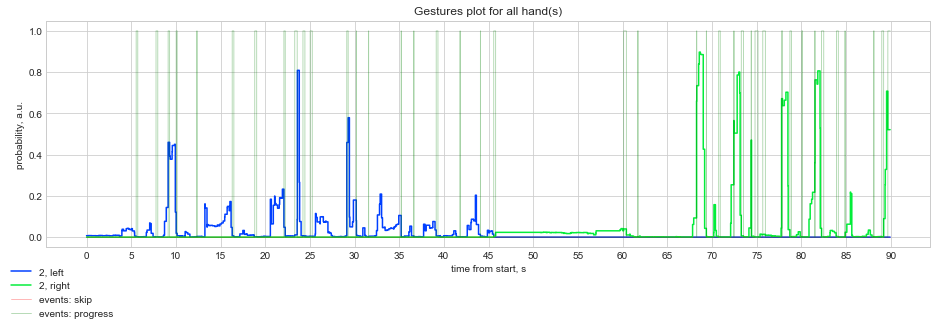

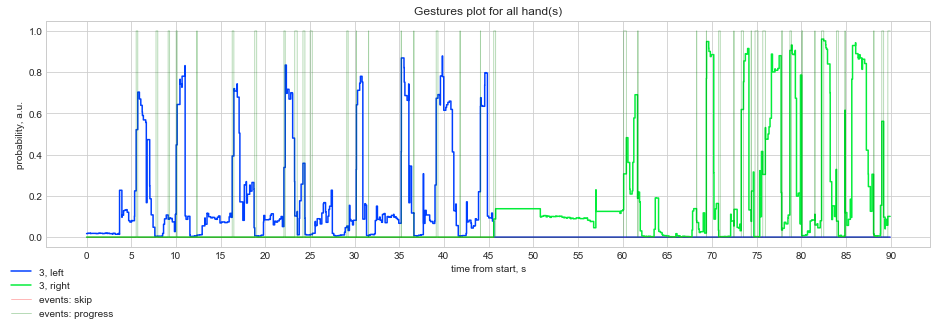

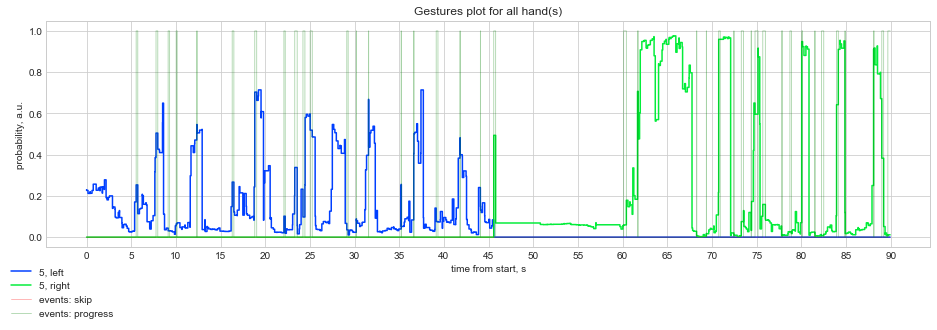

In [28]:
session.plot(gestures="expected", hands="all", separate="gestures", show_events=True)

Отдельно для рук:

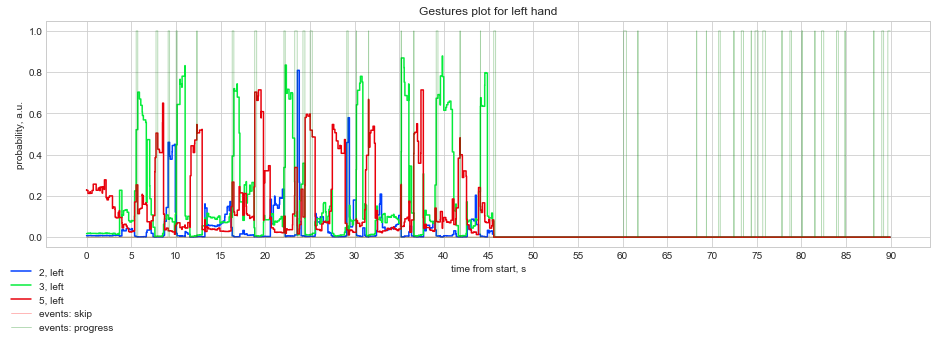

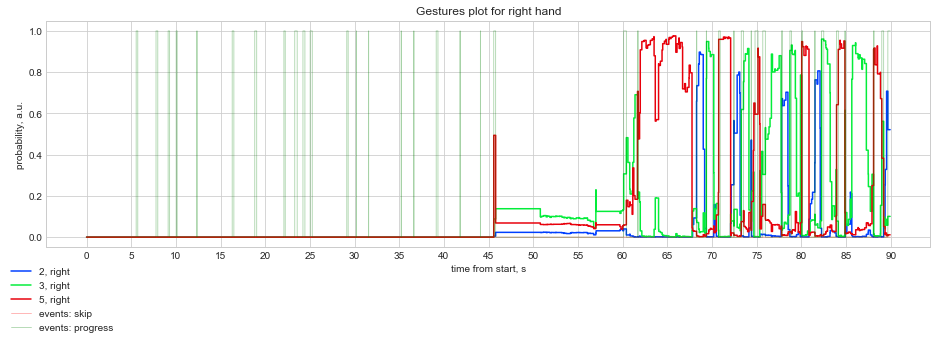

In [29]:
session.plot(gestures="expected", hands="all", separate="hands", show_events=True)

Отдельно для рук и жестов:

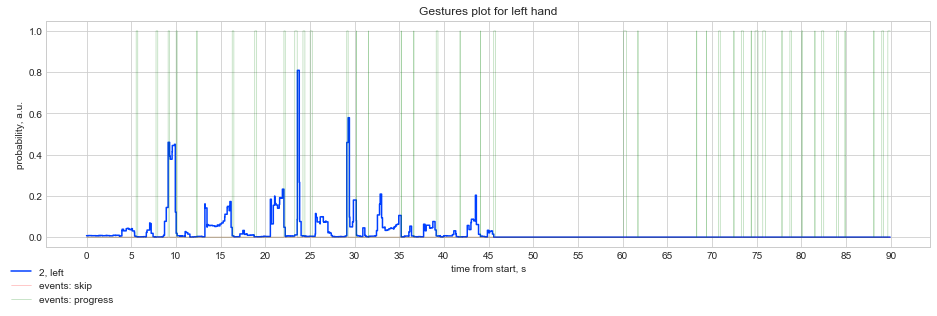

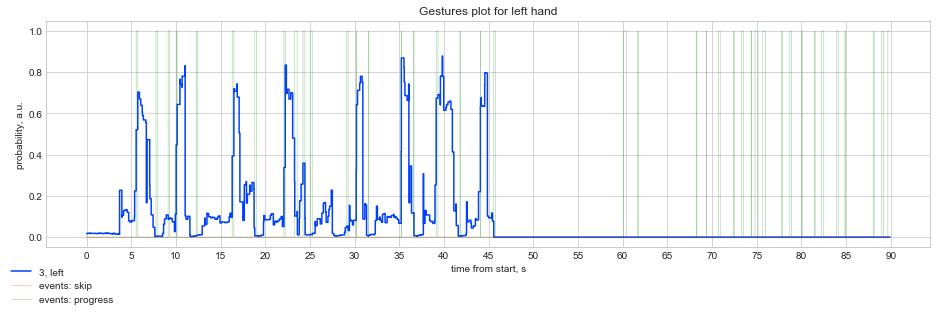

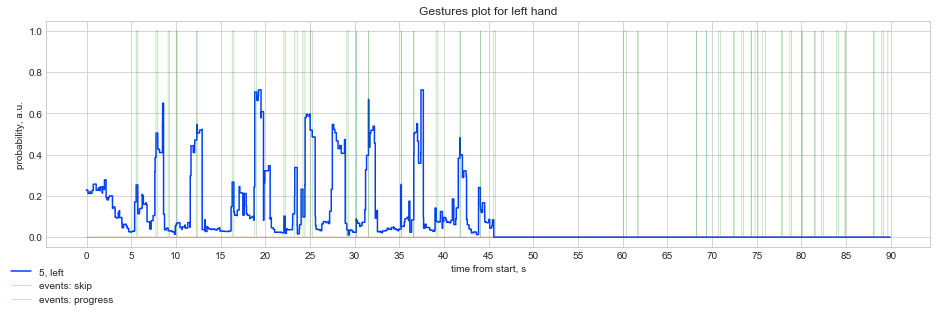

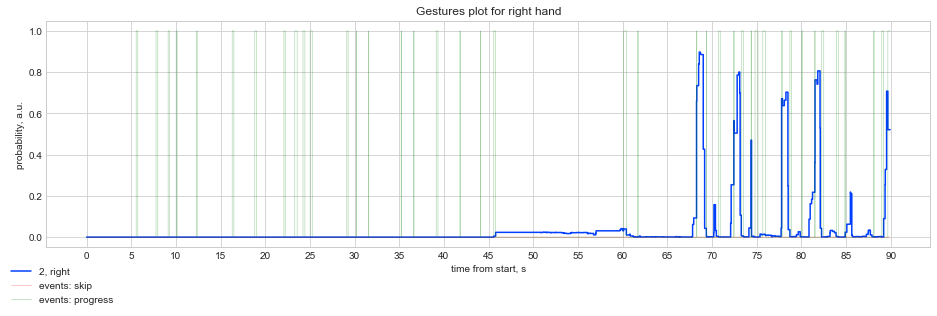

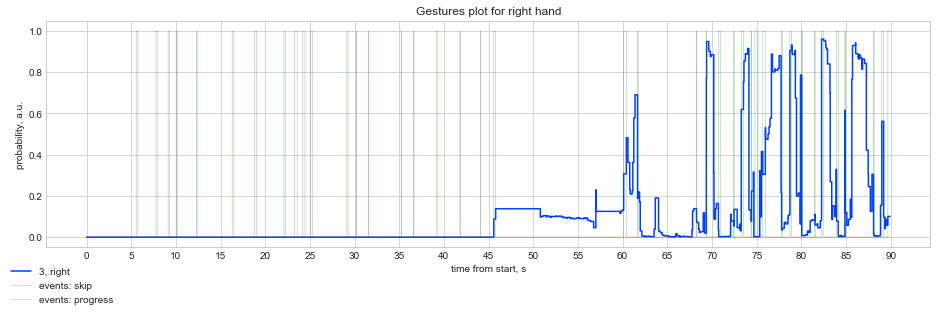

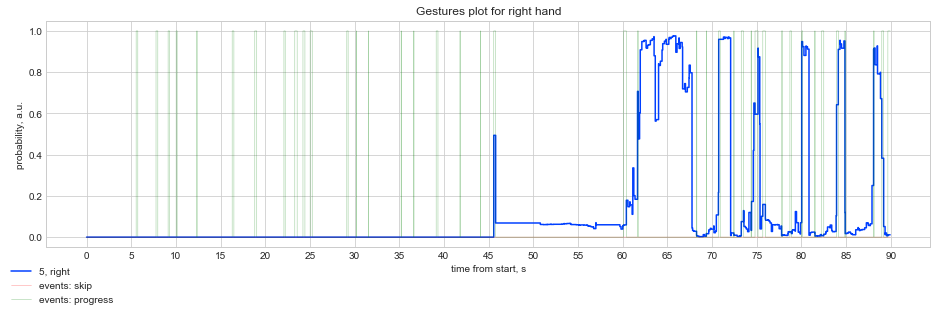

In [30]:
session.plot(gestures="expected", hands="all", separate="all", show_events=True)

**Построение графиков событий отдельно вместе / по отдельности:**

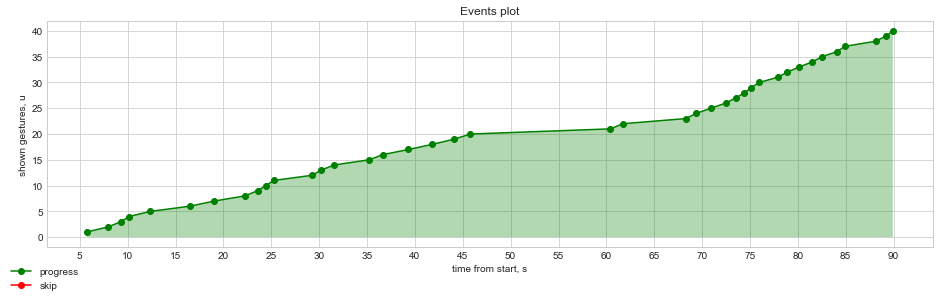

In [31]:
session.plot_events(separate=False)

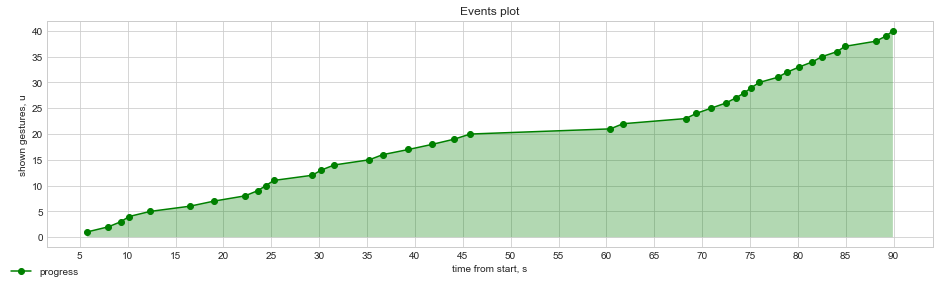

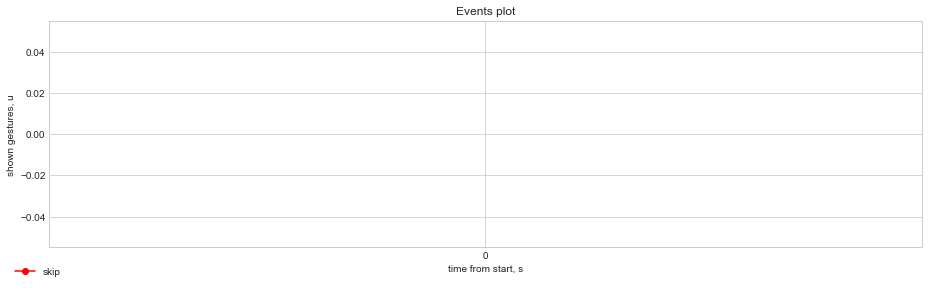

In [32]:
session.plot_events(separate=True)

При работе в тетрадках `Jupyter Notebook` можно использовать функцию для построения интерактивных графиков (появляется возможность менять масштаб нажатием на лупу и выбирать отдельные графики нажатием на легенду:

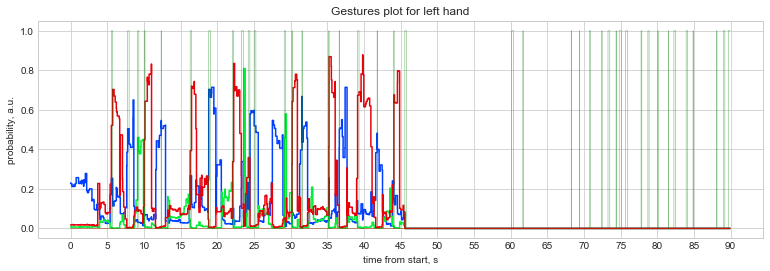

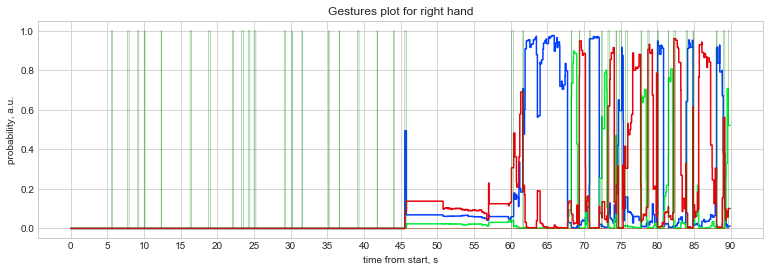

In [33]:
import mpld3
mpld3.enable_notebook()
session.plot_interactive(gestures='expected', hands="all")
mpld3.disable_notebook()

**Вывод последовательностей показанных жестов (`-1` означает отсуствие жеста в кадре для данной руки):**

In [34]:
session.sequence

{'left': array([ 0,  7,  3,  7,  0,  5,  0,  5,  0,  7,  2,  1,  3,  7,  0,  5,  0,
         1,  7,  1,  3,  5,  7,  3,  7,  3,  7,  3,  0,  5,  0,  1,  7,  1,
         3,  5,  7,  2,  7,  3,  0,  5,  0,  1,  7,  1,  7,  5,  0,  5,  0,
         2,  1,  7,  1,  3,  1,  0,  5,  0,  5,  0,  1,  7,  1,  3,  1,  3,
         0,  5,  0,  5,  0,  7,  1,  3,  7,  0,  5,  0,  7,  1,  5,  3,  7,
        -1]),
 'right': array([-1,  5,  7, 11, 12,  7, 11,  7, 12,  0,  3,  7,  3, 12,  3,  5,  0,
         7,  2,  1,  3,  1,  7,  0,  5,  1,  2,  1,  3,  1,  2,  7,  5,  1,
         3,  1,  2,  1,  3,  7,  1,  7,  3,  5,  1,  2,  1,  3,  7,  3,  5,
         3,  1,  7,  2,  1,  3,  1,  7,  3,  5,  3,  1,  2])}

Можно преобразовать к виду, использующему названия жестов:

In [35]:
print(" - ".join([session.gesture_names[g] for g in session.sequence["left"]]))

FIST-TOP - GOAT - RING - GOAT - FIST-TOP - FIST-SIDE - FIST-TOP - FIST-SIDE - FIST-TOP - GOAT - PALM-SIDE - PALM-TOP - RING - GOAT - FIST-TOP - FIST-SIDE - FIST-TOP - PALM-TOP - GOAT - PALM-TOP - RING - FIST-SIDE - GOAT - RING - GOAT - RING - GOAT - RING - FIST-TOP - FIST-SIDE - FIST-TOP - PALM-TOP - GOAT - PALM-TOP - RING - FIST-SIDE - GOAT - PALM-SIDE - GOAT - RING - FIST-TOP - FIST-SIDE - FIST-TOP - PALM-TOP - GOAT - PALM-TOP - GOAT - FIST-SIDE - FIST-TOP - FIST-SIDE - FIST-TOP - PALM-SIDE - PALM-TOP - GOAT - PALM-TOP - RING - PALM-TOP - FIST-TOP - FIST-SIDE - FIST-TOP - FIST-SIDE - FIST-TOP - PALM-TOP - GOAT - PALM-TOP - RING - PALM-TOP - RING - FIST-TOP - FIST-SIDE - FIST-TOP - FIST-SIDE - FIST-TOP - GOAT - PALM-TOP - RING - GOAT - FIST-TOP - FIST-SIDE - FIST-TOP - GOAT - PALM-TOP - FIST-SIDE - RING - GOAT - NOTHING


In [36]:
print(" - ".join([session.gesture_names[g] for g in session.sequence["right"]]))

NOTHING - FIST-SIDE - GOAT - POINTER - GOAT-INV - GOAT - POINTER - GOAT - GOAT-INV - FIST-TOP - RING - GOAT - RING - GOAT-INV - RING - FIST-SIDE - FIST-TOP - GOAT - PALM-SIDE - PALM-TOP - RING - PALM-TOP - GOAT - FIST-TOP - FIST-SIDE - PALM-TOP - PALM-SIDE - PALM-TOP - RING - PALM-TOP - PALM-SIDE - GOAT - FIST-SIDE - PALM-TOP - RING - PALM-TOP - PALM-SIDE - PALM-TOP - RING - GOAT - PALM-TOP - GOAT - RING - FIST-SIDE - PALM-TOP - PALM-SIDE - PALM-TOP - RING - GOAT - RING - FIST-SIDE - RING - PALM-TOP - GOAT - PALM-SIDE - PALM-TOP - RING - PALM-TOP - GOAT - RING - FIST-SIDE - RING - PALM-TOP - PALM-SIDE


Вывод кадров из выбранного временного диапазона:

Found 7 frames in timerange [4 s, 6 s]:


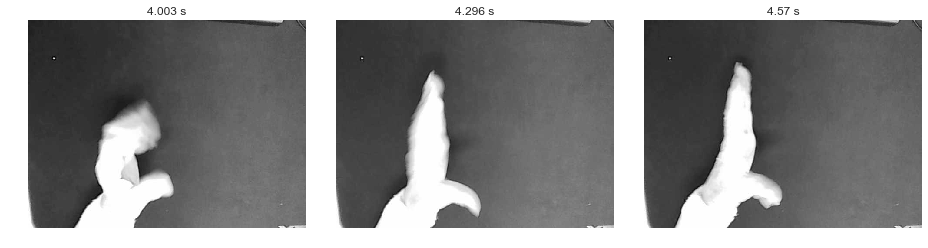

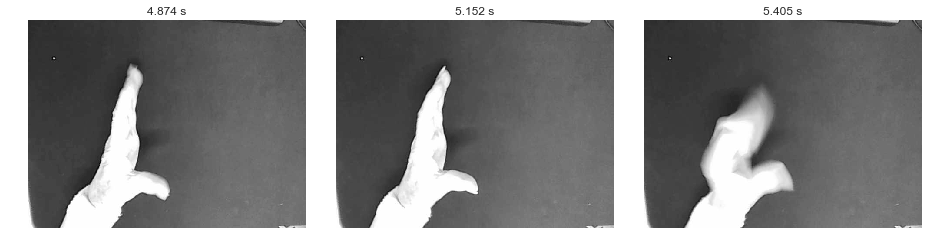

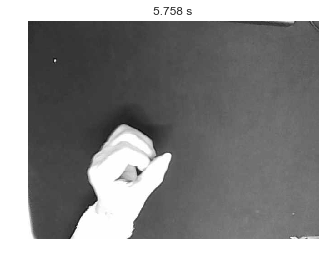

In [37]:
session.show_frames(4, 6, units='s')

Found 6 frames in timerange [0 ms, 1500 ms]:


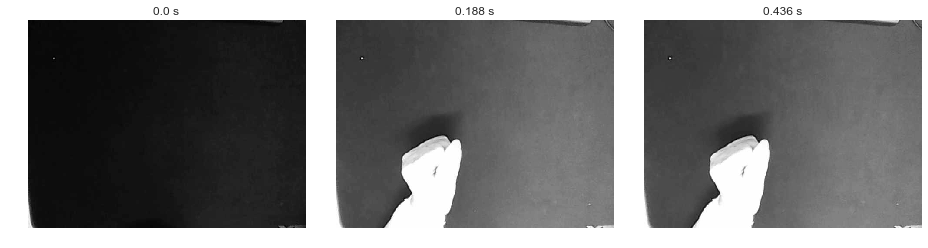

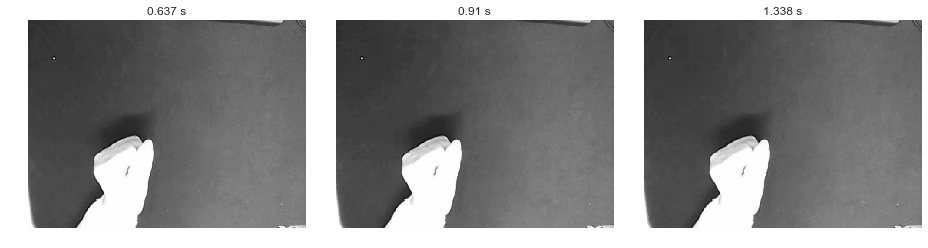

In [38]:
session.show_frames(0, 1500, units='ms')